In [271]:
from numpy import array
from numpy import repeat
from numpy.random import shuffle
from numpy import append
from numpy import arange
from numpy import zeros

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [145]:
def generate_deck(num_deck):
    # 11 == ace; 10 == Jack; 10 == Queen; 10 == King
    decks = repeat(array([1,2,3,4,5,6,7,8,9,10,11,10,10,10]), 4*num_deck)
    shuffle(decks)
    return list(decks)

In [3]:
def check_soft_21(hand):
    # Treat Ace == 11 as 1 if player have more than 21
    if sum(hand) > 21 and 11 in hand:
        hand = append(hand, [-10])
    return hand

In [128]:
def card_count(card):
    if card <= 9:
        return 1
    elif card == 10:
        return -2
    else:
        return 1

Ending cash is $-18619.717214170258
Player won 39 games, blackjack 6
Dealer won 50 games, blackjack 2
Tie 11 and double down 7


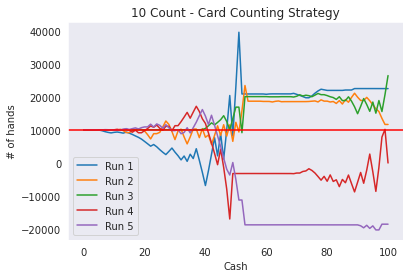

In [399]:
############## Initialize the playing deck ##########################################
turn = 5
run = 100
cash_track = zeros((run+1,turn), dtype = int)
start_cash = 10000

for j in arange(turn):
    #####################################################################################
    ############  Starts Each Run #######################################################
    cash = start_cash
    cash_track[0,j] = cash
    start_bet = 100

    num_deck = 6
    player_win = 0 
    player_blackjack = 0
    dealer_win = 0
    dealer_blackjack = 0
    tie = 0 
    double_down = 0

    # Variables for double down
    # 1 == No; 2 == Yes
    allow_double = 1

    # Variables for card counting
    running_count = 0

    deck = generate_deck(num_deck)
    total_cards = len(deck)
    
    for i in arange(run):
        if allow_card_count:
            if (running_count/(len(deck)/52) - 1) >= 0: 
                bet_size = start_bet * (running_count/(len(deck)/52) - 1)
            else:
                bet_size = start_bet/100

        else:
            bet_size = start_bet

    #     # Reshuffle the deck if it falls below 50%
    #     if len(deck) <= total_cards/2:    
    #         # Generate new deck
    #         deck = generate_deck(num_deck)[0]
    #         running_count = 0

        # Reshuffle the deck if it falls below 10%
        if len(deck) <= total_cards/10:    
            # Generate new deck
            deck = generate_deck(num_deck)
            running_count = 0

        player = array([], dtype = int)
        dealer = array([], dtype = int)
        winner = None

        while winner is None:

            # Deal cards to player
            running_count += card_count(deck[0])
            player = append(player, deck.pop(0))

            running_count += card_count(deck[0])
            player = append(player, deck.pop(0))


            # Deal one card to dealer
            running_count += card_count(deck[0])
            dealer = append(dealer, deck.pop(0))

            dealer = append(dealer, deck.pop(0))

        #     print(f'Dealer first card is {dealer}')

            # If player get 21, then player win
            if sum(player) == 21 and sum(dealer) < 21:
                winner = 'Player'
                player_win += 1
                player_blackjack += 1
                cash += bet_size/2
                break

            elif sum(dealer) == 21 and sum(player) < 21:
                winner = 'Dealer'
                dealer_win += 1
                dealer_blackjack += 1
                cash -= bet_size
                break

            elif sum(player) == 21 and sum(dealer) == 21:
                winner = 'Tie'
                tie += 1
                break

    ###################################################################################################
    ######################  #1:  You Hella Basic [Universal Basic Strategy]  ##########################
            
#             strategy_name = 'Universal Basic Strategy'
#             # Player continue to draw cards until a criteria is meet
#             while sum(player) <= 21:
#                 # Check for soft totals of first two cards
#                 if 11 in player and player.size == 2:
#                     if dealer[0] >= 9 and sum(player) <= 18 :
#                         player = append(player, deck.pop(0))
#                         if sum(player) > 21:      
#                             player = check_soft_21(player)
#                     elif sum(player) <= 17:
#                         player = append(player, deck.pop(0))
#                         if sum(player) > 21:      
#                             player = check_soft_21(player)
#                     # Deal with double aces
#                     elif sum(player) == 22:
#                         player = check_soft_21(player)
#                     else:
#                         break

#                 elif dealer[0] >= 7 and sum(player) <= 16:
#                     player = append(player, deck.pop(0))
#                     if 11 in player and sum(player) > 21:      
#                             player = check_soft_21(player)
#                 elif dealer[0] <= 6 and sum(player) <= 11:
#                     player = append(player, deck.pop(0))
#                     if 11 in player and sum(player) > 21:      
#                             player = check_soft_21(player)
#                 elif dealer[0] <= 3 and sum(player) <= 12:
#                     player = append(player, deck.pop(0))
#                     if 11 in player and sum(player) > 21:      
#                             player = check_soft_21(player)
#                 else:
#                     break


    ###################################################################################################
    ######################  #2:   Uno Reserve Card [Mirror Dealer Strategy]   #########################

    #         strategy_name = 'Mirror Dealer Strategy'
    #         if sum(player) == 22:
    #             player = check_soft_21(player)

    #         # Dealer continue to draw until 17 or higher
    #         while sum(player) <= 16:
    #             if 11 in player and sum(player) > 21: 
    #                 player = check_soft_21(player)
    #             else: 
    #                 player = append(player, deck.pop(0))
    #                 player = check_soft_21(player)

    ###################################################################################################
    ######################  #3:   Double Trouble [Basic Strategy with Double Down Strategy]     #################################################


    #         strategy_name = 'Basic Strategy with Double Down Strategy'
    #         # Player continue to draw cards until a criteria is meet
    #         while sum(player) <= 21:
    #             # Check for soft totals of first two cards
    #             if 11 in player and player.size == 2:
    #                 # Deal with double aces
    #                 if sum(player) == 22:
    #                     player = check_soft_21(player)
    #                 # Hit Soft Totals
    #                 elif dealer[0] >= 9 and sum(player) <= 18 :
    #                     player = append(player, deck.pop(0))
    #                     if sum(player) > 21:      
    #                         player = check_soft_21(player)
    #                 elif dealer[0] >= 7 and sum(player) <= 17:
    #                     player = append(player, deck.pop(0))
    #                     if sum(player) > 21:      
    #                         player = check_soft_21(player)
    #                 elif dealer[0] <=4 and sum(player) <= 14:
    #                     player = append(player, deck.pop(0))
    #                     if sum(player) > 21:      
    #                         player = check_soft_21(player)
    #                 elif dealer[0] <=3 and sum(player) <= 16:
    #                     player = append(player, deck.pop(0))
    #                     if sum(player) > 21:      
    #                         player = check_soft_21(player)
    #                 elif dealer[0] <= 2 and sum(player) <= 17:
    #                     player = append(player, deck.pop(0))
    #                     if sum(player) > 21:      
    #                         player = check_soft_21(player)

    #                 # Double Down soft Total
    #                 elif dealer[0] == 6 and sum(player) == 19:
    #                     player = append(player, deck.pop(0))
    #                     allow_double = 2
    #                     double_down += 1
    #                     if sum(player) > 21:      
    #                         player = check_soft_21(player)
    #                     break
    #                 elif dealer[0] <= 6 and sum(player) == 18:
    #                     player = append(player, deck.pop(0))
    #                     allow_double = 2
    #                     double_down += 1
    #                     if sum(player) > 21:      
    #                         player = check_soft_21(player)
    #                     break
    #                 elif dealer[0] >= 3 and dealer[0] <= 6 and sum(player)==17:
    #                     player = append(player, deck.pop(0))
    #                     allow_double = 2
    #                     double_down += 1
    #                     if sum(player) > 21:      
    #                         player = check_soft_21(player)
    #                     break
    #                 elif dealer[0] >=4 and dealer[0] <= 6 and sum(player) <= 15 and sum(player) <=16:
    #                     player = append(player, deck.pop(0))
    #                     allow_double = 2
    #                     double_down += 1
    #                     if sum(player) > 21:      
    #                         player = check_soft_21(player)
    #                     break
    #                 elif dealer[0] >=5 and dealer[0] <= 6 and sum(player) <= 14 and sum(player) <=13:
    #                     player = append(player, deck.pop(0))
    #                     allow_double = 2
    #                     double_down += 1
    #                     if sum(player) > 21:      
    #                         player = check_soft_21(player)
    #                     break
    #                 else:
    #                     break

    #             # Hit Hard Totals
    #             elif dealer[0] >= 7 and sum(player) <= 16 and sum(player)>= 12: 
    #                 player = append(player, deck.pop(0))
    #                 if 11 in player and sum(player) > 21:      
    #                         player = check_soft_21(player)
    #             elif dealer[0] >= 10 and sum(player) <= 10:
    #                 player = append(player, deck.pop(0))
    #                 if 11 in player and sum(player) > 21:      
    #                         player = check_soft_21(player)
    #             elif dealer[0] >= 7 and sum(player) <= 9:
    #                 player = append(player, deck.pop(0))
    #                 if 11 in player and sum(player) > 21:      
    #                         player = check_soft_21(player)
    #             elif dealer[0] <= 3 and sum(player) == 12:
    #                 player = append(player, deck.pop(0))
    #                 if 11 in player and sum(player) > 21:      
    #                         player = check_soft_21(player)
    #             elif dealer[0] == 2 and sum(player) == 9:
    #                 player = append(player, deck.pop(0))
    #                 if 11 in player and sum(player) > 21:      
    #                         player = check_soft_21(player)
    #             elif sum(player) <= 8:
    #                 player = append(player, deck.pop(0))
    #                 if 11 in player and sum(player) > 21:      
    #                         player = check_soft_21(player)
    #             elif dealer[0] <= 3 and sum(player) <= 12:
    #                 player = append(player, deck.pop(0))
    #                 if 11 in player and sum(player) > 21:      
    #                         player = check_soft_21(player)

    #             # Double Down Hard Totals
    #             elif sum(player) == 11:
    #                 player = append(player, deck.pop(0))
    #                 allow_double = 2
    #                 double_down += 1
    #                 if 11 in player and sum(player) > 21:      
    #                         player = check_soft_21(player)
    #                 break
    #             elif dealer[0] <= 9 and sum(player) == 10:
    #                 player = append(player, deck.pop(0))
    #                 allow_double = 2
    #                 double_down += 1
    #                 if 11 in player and sum(player) > 21:      
    #                         player = check_soft_21(player)
    #                 break
    #             elif dealer[0] >= 3 and dealer[0] <= 6 and sum(player) == 9:
    #                 player = append(player, deck.pop(0))
    #                 allow_double = 2
    #                 double_down += 1

    #                 if 11 in player and sum(player) > 21:      
    #                         player = check_soft_21(player)
    #                 break
    #             else:
    #                 break


    ###################################################################################################
    ######################  #4:   You Move You Lose - [Draw Until => 10 Strategy]     #########################################

    #         strategy_name = 'Draw Until => 10 Strategy'
    #         if sum(player) == 22:
    #             player = check_soft_21(player)
    #             # Dealer continue to draw until 17 or higher
    #             while sum(player) <= 10:
    #                 if 11 in player and sum(player) > 21: 
    #                     player = check_soft_21(player)
    #                 else: 
    #                     player = append(player, deck.pop(0))
    #                     player = check_soft_21(player)

    ###################################################################################################
    ######################  #5:   Go Big or Go Homev [Double Down Under 12 otherwise Stay Strategy]     ######################################

    #         strategy_name = 'Double Down Under 12 otherwise Stay Strategy'
    #         if sum(player) == 22:
    #             player = check_soft_21(player)
    #         # If player is under 12, double down
    #         elif sum(player) <= 12:
    #             player = append(player, deck.pop(0))
    #             player = check_soft_21(player)
    #             allow_double = 2
    #             double_down += 1

    ##################################################################################################
    #####################  #6:   1+1=-100 [10 Count - Card Counting Strategy]     ##################################

            strategy_name = '10 Count - Card Counting Strategy'
            allow_card_count = True
            
            # Player continue to draw cards until a criteria is meet
            while sum(player) <= 21:
                # Check for soft totals of first two cards
                if 11 in player and player.size == 2:
                    # Deal with double aces
                    if sum(player) == 22:
                        player = check_soft_21(player)
                    # Hit Soft Totals
                    elif dealer[0] >= 9 and sum(player) <= 18 :
                        running_count += card_count(deck[0])
                        player = append(player, deck.pop(0))
                        if sum(player) > 21:      
                            player = check_soft_21(player)
                    elif dealer[0] >= 7 and sum(player) <= 17:
                        running_count += card_count(deck[0])
                        player = append(player, deck.pop(0))
                        if sum(player) > 21:      
                            player = check_soft_21(player)
                    elif dealer[0] <=4 and sum(player) <= 14:
                        running_count += card_count(deck[0])
                        player = append(player, deck.pop(0))
                        if sum(player) > 21:      
                            player = check_soft_21(player)
                    elif dealer[0] <=3 and sum(player) <= 16:
                        running_count += card_count(deck[0])
                        player = append(player, deck.pop(0))
                        if sum(player) > 21:      
                            player = check_soft_21(player)
                    elif dealer[0] <= 2 and sum(player) <= 17:
                        running_count += card_count(deck[0])
                        player = append(player, deck.pop(0))
                        if sum(player) > 21:      
                            player = check_soft_21(player)

                    # Double Down soft Total
                    elif dealer[0] == 6 and sum(player) == 19:
                        running_count += card_count(deck[0])
                        player = append(player, deck.pop(0))
                        allow_double = 2
                        double_down += 1
                        if sum(player) > 21:      
                            player = check_soft_21(player)
                        break
                    elif dealer[0] <= 6 and sum(player) == 18:
                        running_count += card_count(deck[0])
                        player = append(player, deck.pop(0))
                        allow_double = 2
                        double_down += 1
                        if sum(player) > 21:      
                            player = check_soft_21(player)
                        break
                    elif dealer[0] >= 3 and dealer[0] <= 6 and sum(player)==17:
                        running_count += card_count(deck[0])
                        player = append(player, deck.pop(0))
                        allow_double = 2
                        double_down += 1
                        if sum(player) > 21:      
                            player = check_soft_21(player)
                        break
                    elif dealer[0] >=4 and dealer[0] <= 6 and sum(player) <= 15 and sum(player) <=16:
                        running_count += card_count(deck[0])
                        player = append(player, deck.pop(0))
                        allow_double = 2
                        double_down += 1
                        if sum(player) > 21:      
                            player = check_soft_21(player)
                        break
                    elif dealer[0] >=5 and dealer[0] <= 6 and sum(player) <= 14 and sum(player) <=13:
                        running_count += card_count(deck[0])
                        player = append(player, deck.pop(0))
                        allow_double = 2
                        double_down += 1
                        if sum(player) > 21:      
                            player = check_soft_21(player)
                        break
                    else:
                        break

                # Hit Hard Totals
                elif dealer[0] >= 7 and sum(player) <= 16 and sum(player)>= 12:
                    running_count += card_count(deck[0])
                    player = append(player, deck.pop(0))
                    if 11 in player and sum(player) > 21:      
                            player = check_soft_21(player)
                elif dealer[0] >= 10 and sum(player) <= 10:
                    running_count += card_count(deck[0])
                    player = append(player, deck.pop(0))
                    if 11 in player and sum(player) > 21:      
                            player = check_soft_21(player)
                elif dealer[0] >= 7 and sum(player) <= 9:
                    running_count += card_count(deck[0])
                    player = append(player, deck.pop(0))
                    if 11 in player and sum(player) > 21:      
                            player = check_soft_21(player)
                elif dealer[0] <= 3 and sum(player) == 12:
                    running_count += card_count(deck[0])
                    player = append(player, deck.pop(0))
                    if 11 in player and sum(player) > 21:      
                            player = check_soft_21(player)
                elif dealer[0] == 2 and sum(player) == 9:
                    running_count += card_count(deck[0])
                    player = append(player, deck.pop(0))
                    if 11 in player and sum(player) > 21:      
                            player = check_soft_21(player)
                elif sum(player) <= 8:
                    running_count += card_count(deck[0])
                    player = append(player, deck.pop(0))
                    if 11 in player and sum(player) > 21:      
                            player = check_soft_21(player)
                elif dealer[0] <= 3 and sum(player) <= 12:
                    running_count += card_count(deck[0])
                    player = append(player, deck.pop(0))
                    if 11 in player and sum(player) > 21:      
                            player = check_soft_21(player)

                # Double Down Hard Totals
                elif sum(player) == 11:
                    running_count += card_count(deck[0])
                    player = append(player, deck.pop(0))
                    allow_double = 2
                    double_down += 1
                    if 11 in player and sum(player) > 21:      
                            player = check_soft_21(player)
                    break
                elif dealer[0] <= 9 and sum(player) == 10:
                    running_count += card_count(deck[0])
                    player = append(player, deck.pop(0))
                    allow_double = 2
                    double_down += 1
                    if 11 in player and sum(player) > 21:      
                            player = check_soft_21(player)
                    break
                elif dealer[0] >= 3 and dealer[0] <= 6 and sum(player) == 9:
                    running_count += card_count(deck[0])
                    player = append(player, deck.pop(0))
                    allow_double = 2
                    double_down += 1

                    if 11 in player and sum(player) > 21:      
                            player = check_soft_21(player)
                    break
                else:
                    break


    ###################################################################################################
    ################  Check for Winner ################################################################                

        # If player busted, dealer win    
            if sum(player) > 21:
                winner = 'Dealer'
                dealer_win += 1 
                cash -= bet_size * allow_double
                break

            # Dealer continue to draw until 17 or higher
            if sum(dealer) == 22:
                dealer = check_soft_21(dealer)

            while sum(dealer) <= 16:
                if 11 in dealer and sum(dealer) > 21: 
                    dealer = check_soft_21(dealer)
                else: 
                    dealer = append(dealer, deck.pop(0))
                    dealer = check_soft_21(dealer)

            # If dealer busted, player in        
            if sum(dealer) > 21:
                winner = 'Player'
                player_win += 1
                cash += bet_size * allow_double
                break


            # Check who have a higher card
            if sum(player) > sum(dealer):
                winner = 'Player'
                player_win += 1
                cash += bet_size * allow_double

            elif sum(player) < sum(dealer):
                winner = 'Dealer'
                dealer_win += 1
                cash -= bet_size * allow_double

            else: 
                winner = 'Tie' 
                tie += 1
    #     print(f'Round {i}: Player {player} vs. Dealer {dealer}')
    #     print(f'Winner {winner} with player {sum(player)} vs. dealer {sum(dealer)}')
        cash_track[i+1,j] = cash

print(f'Ending cash is ${cash}')
print(f'Player won {player_win} games, blackjack {player_blackjack}')
print(f'Dealer won {dealer_win} games, blackjack {dealer_blackjack}')
print(f'Tie {tie} and double down {double_down}')

# Convert saved data into dataframe
cash_track = pd.DataFrame(cash_track).rename(columns = {0:'Run 1',1: 'Run 2', 2:'Run 3', 3: 'Run 4', 4: 'Run 5'})


# Plot the run
fig, ax = plt.subplots()

ax1 = sns.lineplot(x= arange(run+1), y = 'Run 1', data = cash_track, label = 'Run 1')
ax2 = sns.lineplot(x= arange(run+1), y = 'Run 2', data = cash_track, label = 'Run 2')
ax3 = sns.lineplot(x= arange(run+1), y = 'Run 3', data = cash_track, label = 'Run 3')
ax4 = sns.lineplot(x= arange(run+1), y = 'Run 4', data = cash_track, label = 'Run 4')
ax5 = sns.lineplot(x= arange(run+1), y = 'Run 5', data = cash_track, label = 'Run 5')

ax.axhline(start_cash, color = 'red')

plt.title(strategy_name)
plt.ylabel('# of hands')
plt.xlabel('Cash')
plt.legend(loc="lower left")
plt.show()


In [381]:
running_count

30